# Titanic Dataset Analysis
This repository contains an analysis of the Titanic dataset, which provides information about the passengers aboard the Titanic, including their survival

## DataSource
The Titanic dataset can be found on [Kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset)

In [234]:
import pandas as pd
# Read the Titanic dataset
file_path = 'data/titanic/Titanic-Dataset.csv'

df = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

### Inspecting the Dataset

We begin by loading the dataset and inspecting its structure, including the first few rows, data types, and summary statistics.

In [235]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [237]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [238]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data and Visualization
#### Questions to Explore
- Does gender affect survival?
- What is the survival rate across different passenger classes?
- How does age influence survival chances?
- Does family size impact survival?
- Are Children more likely to survive than adults?
- Are there missing values in the dataset? If so, how should we handle them?

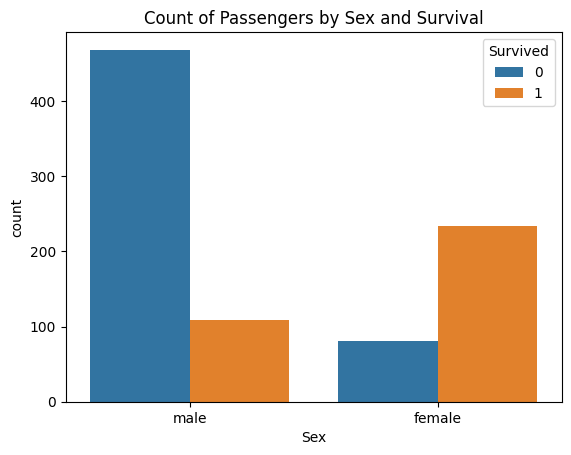

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Count of Passengers by Sex and Survival')
plt.show()

More females survived compared to males.

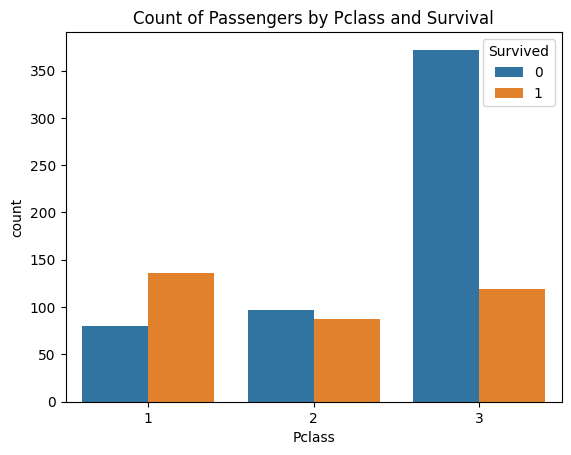

In [240]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Count of Passengers by Pclass and Survival')
plt.show()



Passenger class 1 had a higher survival rate compared to classes 2 and 3. Most died passengers were from class 3.

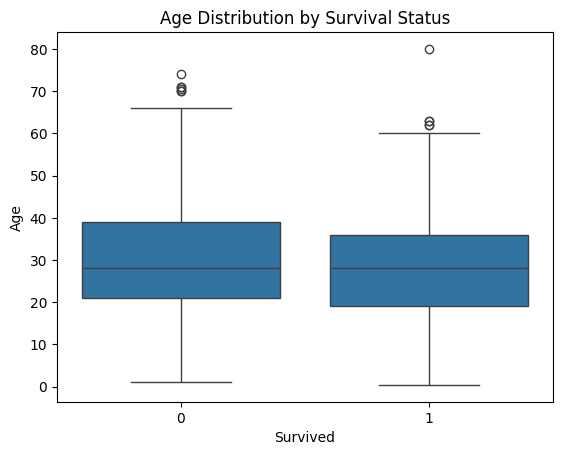

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [241]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()
plt.figure(figsize=(10, 6))


Passengers who survived tended to have a lower median age compared to those who did not survive.

#### Data Cleaning
There is missing data in the 'Age' and 'Cabin' columns. We will need to decide how to handle these missing values, either by imputing them or removing the rows/columns.

In [242]:
df['Age'] = df['Age'].fillna(df['Age'].median()) 
df.drop(['Cabin'], axis=1, inplace=True) # Too many missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # Fill missing 'Embarked' with mode
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=False) # Create fare groups

#### Feature Engineering

Create new features that may help improve model performance, such as family size or titles


In [243]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


In [244]:
# print all unique titles
print(df['Title'].unique()) 

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


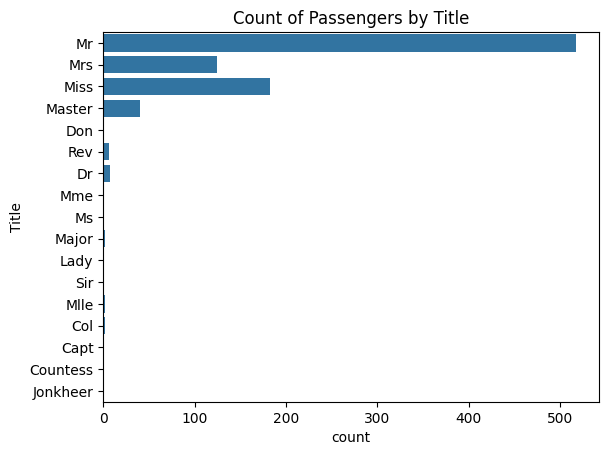

In [245]:
#visualize the count of each title
sns.countplot(y='Title', data=df)
plt.title('Count of Passengers by Title')
plt.show()

In [246]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'SibSp', 'Parch'], axis=1, inplace=True) # Remove unnecessary columns

Visualizing the relationships between these features and survival can provide insights into the factors that influenced survival rates.

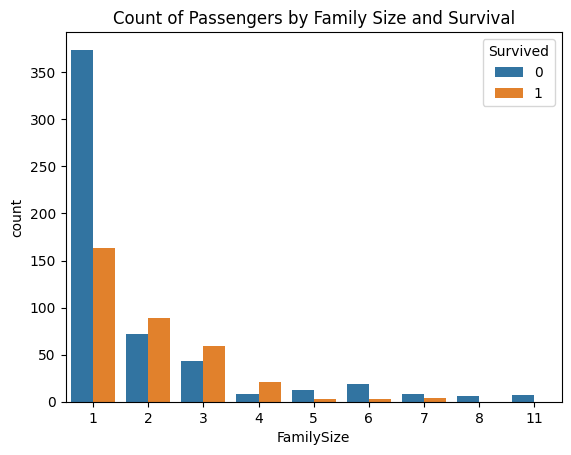

In [247]:
sns.countplot(data=df, hue='Survived', x='FamilySize')
plt.title('Count of Passengers by Family Size and Survival')
plt.show()


Looks like single passengers survived higher but survival rate is higher for family size of 2-4.

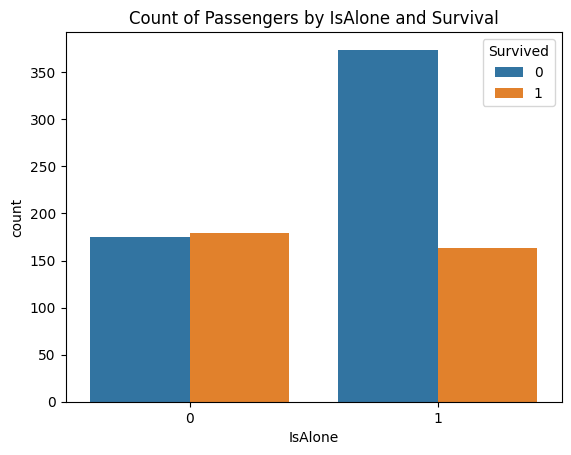

In [248]:
sns.countplot(data=df, hue='Survived', x='IsAlone')
plt.title('Count of Passengers by IsAlone and Survival')
plt.show()

If we look at the 'IsAlone' feature, we can see that passengers who were alone had a lower survival rate compared to those who were with family. 

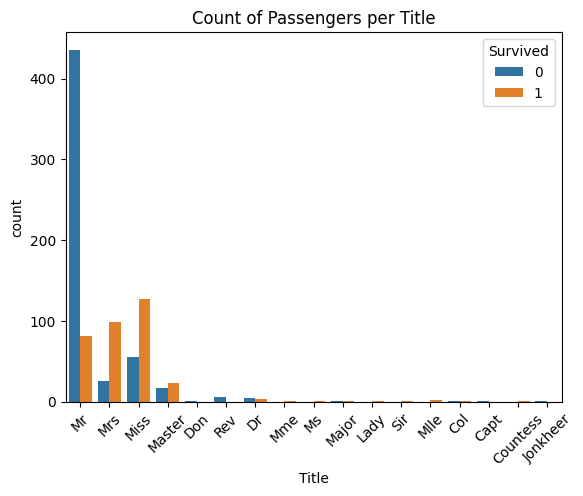

In [249]:
sns.countplot(x='Title', data=df, hue='Survived')
plt.title('Count of Passengers per Title')
plt.xticks(rotation=45)
plt.show()

Ladies with the title 'Miss' had a higher survival rate compared to other titles.
Kids with the title 'Master' also had a relatively high survival rate.

Least survival rate is for 'Mr' title

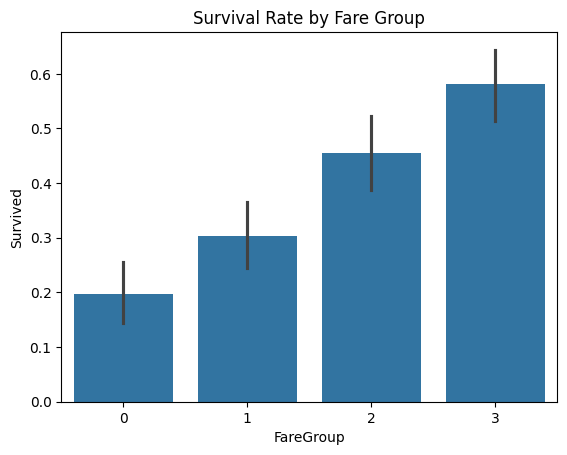

In [250]:
sns.barplot(x='FareGroup', y='Survived', data=df)
plt.title('Survival Rate by Fare Group')
plt.show()

## Data Preprocessing
Before training machine learning models, we need to preprocess the data. 

In [251]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,FareGroup,FamilySize,IsAlone,Title
0,0,3,male,22.0,S,0,2,0,Mr
1,1,1,female,38.0,C,3,2,0,Mrs
2,1,3,female,26.0,S,1,1,1,Miss
3,1,1,female,35.0,S,3,2,0,Mrs
4,0,3,male,35.0,S,1,1,1,Mr


In [252]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = ['Sex', 'Embarked', 'Title', 'Pclass', 'FareGroup']
numerical_features = ['Age', 'FamilySize', 'IsAlone']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ])

X = df.drop('Survived', axis=1)
y = df['Survived']

#### Test Train Split


In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

/Users/amitupadhyay/Desktop/Projects/Personal/ML/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Training logistic Regression Model
We will train a logistic regression model to predict survival based on the features in the dataset. After training, we will evaluate the model's performance.

In [254]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Evaluation
### Classification Metrics

In [255]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[89 16]
 [16 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



### ROC Curve & AUC

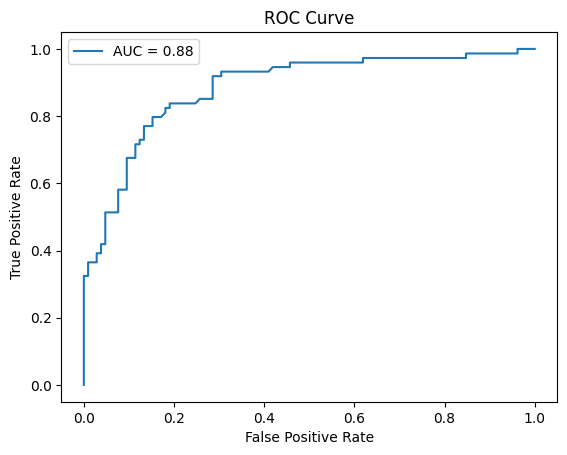

In [256]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()